In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
os.getcwd()

'/home/david/Documentos/Analisisdevariables/Graficar boxplots'

In [2]:
%cd /home/david/Vídeos


/home/david/Vídeos


In [3]:
datos = pd.read_csv("DB9septiembre.csv")
datos.head()


,filename,chroma_stft,spectral_centroid,spectral_bandwidth,tonnets,ADI,TE,EMS,MD,p,transformacion
0,5067/20151212/M0S5067__0__20151212_115000.wav,0.690560,3640.598838,3726.118177,0.0061099445617758930.9856493474100835,0.998984,0.930453,-11.735779,1.173283,5067,Alta
1,5067/20151212/M0S5067__0__20151213_185000.wav,0.337765,4245.616677,2915.669095,0.00259429669731709672.212801582992966,0.995157,0.948503,-12.204839,36.780960,5067,Alta
2,5067/20151212/M0S5067__0__20151214_211000.wav,0.216557,4281.854638,2824.307292,0.00145109830201448472.557999717952512,0.994575,0.968675,-12.089845,62.288357,5067,Alta
3,5067/20151212/M0S5067__0__20151216_140000.wav,0.666285,3699.865800,3743.574753,0.0041175917689467621.1741120040058952,0.998354,0.910689,-11.885508,2.006087,5067,Alta
4,5067/20151212/M0S5067__0__20151222_223000.wav,0.433324,3534.083397,3113.467248,0.0050792732018395282.176774488729424,0.996233,0.971866,-12.098396,19.736820,5067,Alta


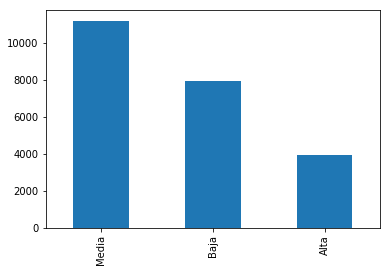

In [4]:
datos['transformacion'].value_counts().plot(kind='bar')

In [5]:
datos.shape

(23059, 11)

In [6]:
d=datos.iloc[:,1:9].copy()

In [7]:
d.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,tonnets,ADI,TE,EMS,MD
0,0.690560,3640.598838,3726.118177,0.0061099445617758930.9856493474100835,0.998984,0.930453,-11.735779,1.173283
1,0.337765,4245.616677,2915.669095,0.00259429669731709672.212801582992966,0.995157,0.948503,-12.204839,36.780960
2,0.216557,4281.854638,2824.307292,0.00145109830201448472.557999717952512,0.994575,0.968675,-12.089845,62.288357
3,0.666285,3699.865800,3743.574753,0.0041175917689467621.1741120040058952,0.998354,0.910689,-11.885508,2.006087
4,0.433324,3534.083397,3113.467248,0.0050792732018395282.176774488729424,0.996233,0.971866,-12.098396,19.736820


In [8]:
type(d.tonnets[1])

str

In [9]:
d['tonnets']=d['tonnets'].str.slice(0, 9)

In [10]:
d.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,tonnets,ADI,TE,EMS,MD
0,0.690560,3640.598838,3726.118177,0.0061099,0.998984,0.930453,-11.735779,1.173283
1,0.337765,4245.616677,2915.669095,0.0025942,0.995157,0.948503,-12.204839,36.780960
2,0.216557,4281.854638,2824.307292,0.0014510,0.994575,0.968675,-12.089845,62.288357
3,0.666285,3699.865800,3743.574753,0.0041175,0.998354,0.910689,-11.885508,2.006087
4,0.433324,3534.083397,3113.467248,0.0050792,0.996233,0.971866,-12.098396,19.736820


In [11]:
 d=d.rename(columns={"ADI":"te", "TE":"ems", "EMS":"md", "MD":"p"})

In [12]:
d['tonnets'] = pd.to_numeric(d['tonnets'])
d.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,tonnets,te,ems,md,p
0,0.690560,3640.598838,3726.118177,0.006110,0.998984,0.930453,-11.735779,1.173283
1,0.337765,4245.616677,2915.669095,0.002594,0.995157,0.948503,-12.204839,36.780960
2,0.216557,4281.854638,2824.307292,0.001451,0.994575,0.968675,-12.089845,62.288357
3,0.666285,3699.865800,3743.574753,0.004117,0.998354,0.910689,-11.885508,2.006087
4,0.433324,3534.083397,3113.467248,0.005079,0.996233,0.971866,-12.098396,19.736820


In [13]:
d['label'] = datos['transformacion']


In [14]:
d.to_csv("datostonnetsjuntos9sep.csv")

In [15]:
metadata=datos[['filename','p','transformacion']]



In [16]:
metadata.head()

,filename,p,transformacion
0,5067/20151212/M0S5067__0__20151212_115000.wav,5067,Alta
1,5067/20151212/M0S5067__0__20151213_185000.wav,5067,Alta
2,5067/20151212/M0S5067__0__20151214_211000.wav,5067,Alta
3,5067/20151212/M0S5067__0__20151216_140000.wav,5067,Alta
4,5067/20151212/M0S5067__0__20151222_223000.wav,5067,Alta


In [17]:
d=d._get_numeric_data()
d.head()
d.shape

(23059, 8)

In [18]:
d.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,tonnets,te,ems,md,p
0,0.690560,3640.598838,3726.118177,0.006110,0.998984,0.930453,-11.735779,1.173283
1,0.337765,4245.616677,2915.669095,0.002594,0.995157,0.948503,-12.204839,36.780960
2,0.216557,4281.854638,2824.307292,0.001451,0.994575,0.968675,-12.089845,62.288357
3,0.666285,3699.865800,3743.574753,0.004117,0.998354,0.910689,-11.885508,2.006087
4,0.433324,3534.083397,3113.467248,0.005079,0.996233,0.971866,-12.098396,19.736820


In [19]:
x= StandardScaler().fit_transform(d.values)  ##give numpy array values
scalx=pd.DataFrame(x,index=d.index,columns=d.columns) #so we need to transform it 
d=scalx.copy()
scalx.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,tonnets,te,ems,md,p
0,0.534250,0.322294,2.174261,-0.001151,0.657102,-0.639829,-0.579306,-0.225362
1,-0.892178,0.695371,0.431782,-0.005668,0.171279,-0.005476,-0.731986,-0.114337
2,-1.382249,0.717717,0.235353,-0.007137,0.097483,0.703400,-0.694555,-0.034805
3,0.436101,0.358840,2.211793,-0.003711,0.577077,-1.334370,-0.628043,-0.222765
4,-0.505811,0.256612,0.857051,-0.002475,0.307925,0.815542,-0.697338,-0.167481


In [20]:
df=scalx.copy()
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
a=remove_outlier(df, 'tonnets')
a=remove_outlier(a, 'p')
a=remove_outlier(a, 'te')
a=remove_outlier(a, 'ems')

In [21]:
a.shape

(16972, 8)

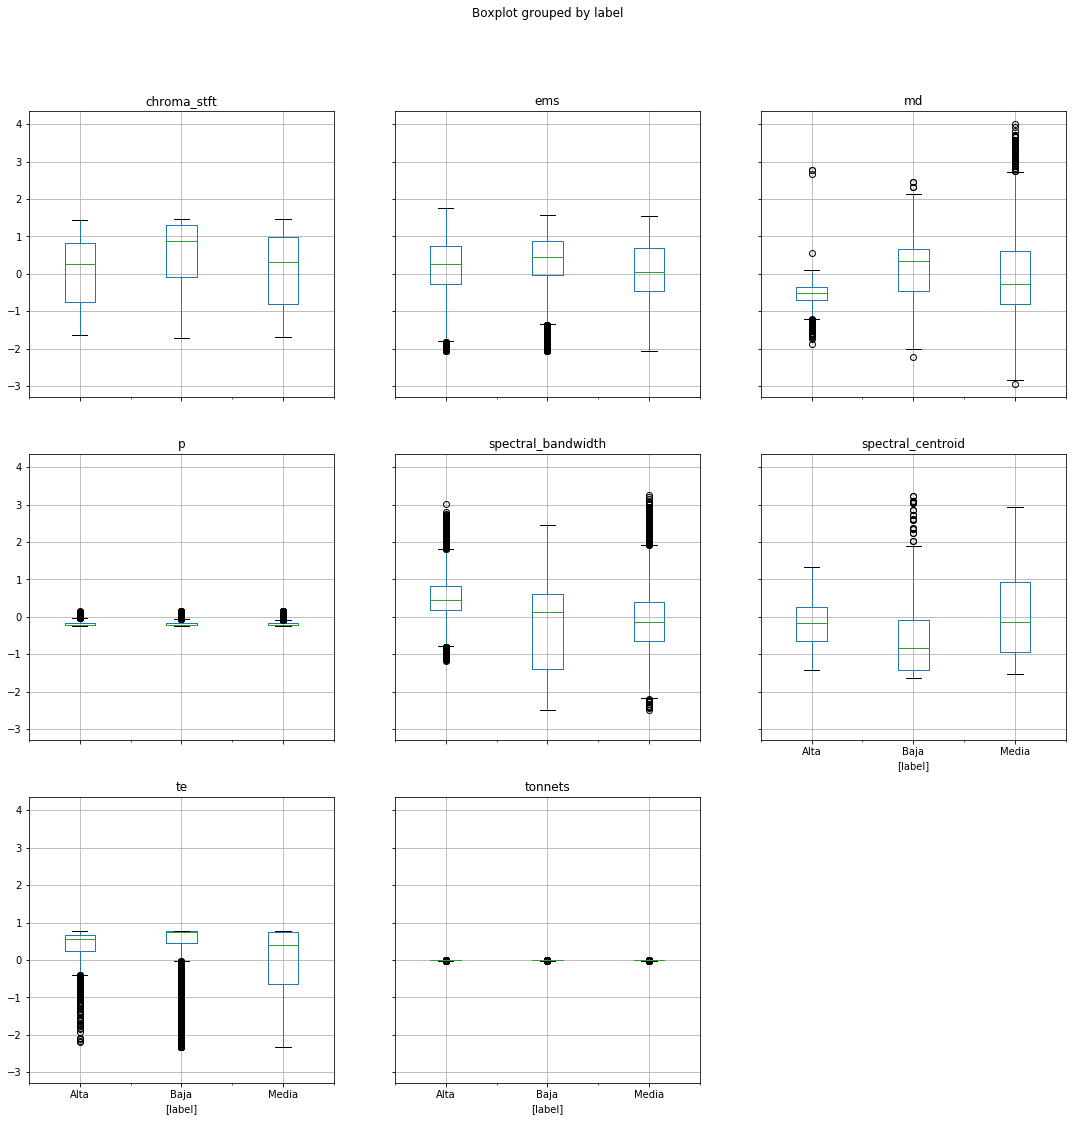

In [22]:

scalxlabel=a
scalxlabel['label']= datos.transformacion
fig=scalxlabel.boxplot(figsize = (18,18),by='label')


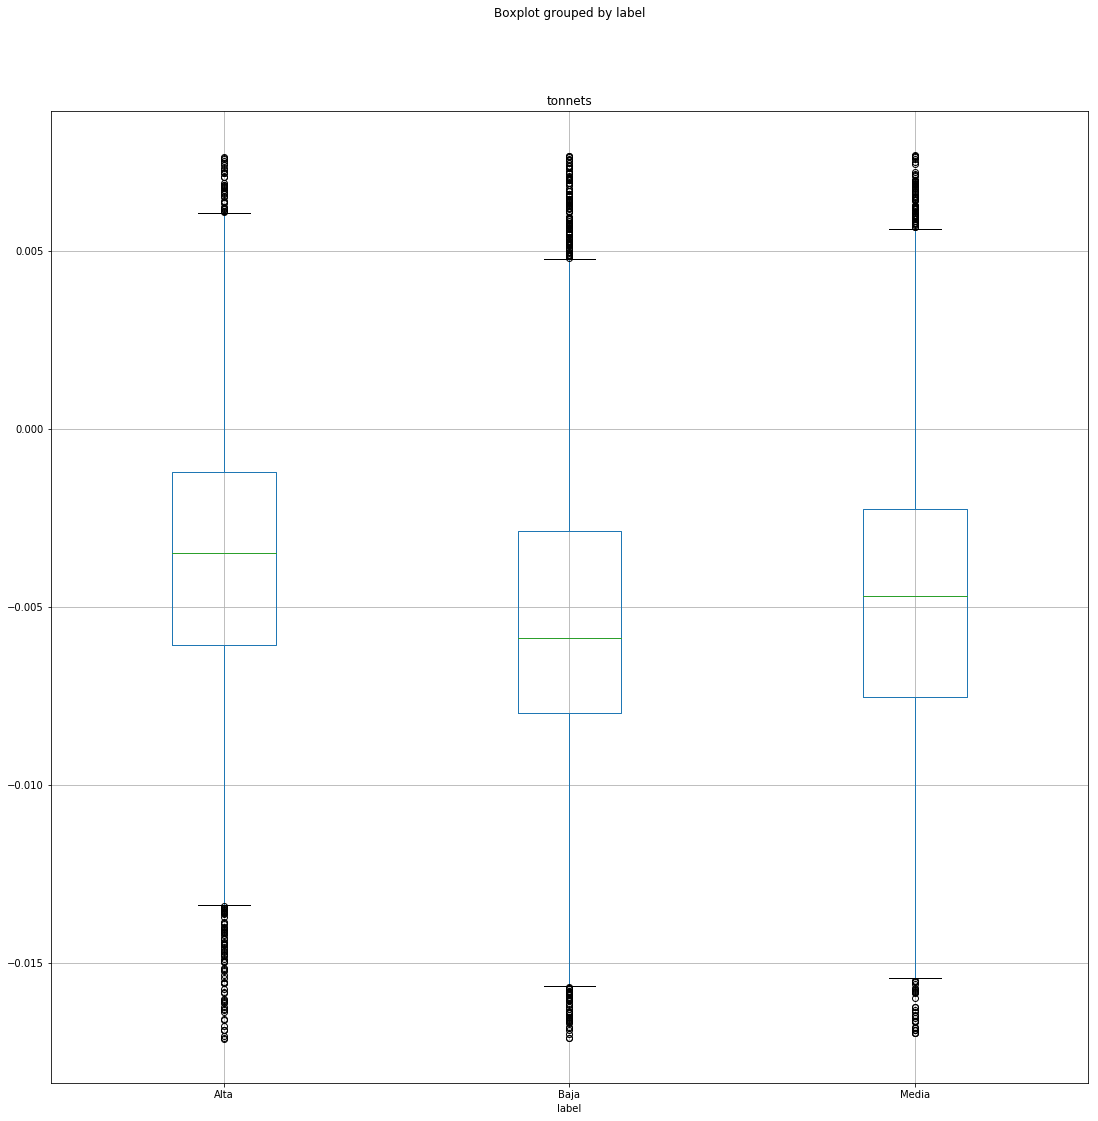

In [23]:
a['label']= datos.transformacion

a.boxplot(column='tonnets', by='label',figsize = (18,18))

In [24]:
datos=datos.dropna()

In [25]:
datos.head()

,filename,chroma_stft,spectral_centroid,spectral_bandwidth,tonnets,ADI,TE,EMS,MD,p,transformacion
0,5067/20151212/M0S5067__0__20151212_115000.wav,0.690560,3640.598838,3726.118177,0.0061099445617758930.9856493474100835,0.998984,0.930453,-11.735779,1.173283,5067,Alta
1,5067/20151212/M0S5067__0__20151213_185000.wav,0.337765,4245.616677,2915.669095,0.00259429669731709672.212801582992966,0.995157,0.948503,-12.204839,36.780960,5067,Alta
2,5067/20151212/M0S5067__0__20151214_211000.wav,0.216557,4281.854638,2824.307292,0.00145109830201448472.557999717952512,0.994575,0.968675,-12.089845,62.288357,5067,Alta
3,5067/20151212/M0S5067__0__20151216_140000.wav,0.666285,3699.865800,3743.574753,0.0041175917689467621.1741120040058952,0.998354,0.910689,-11.885508,2.006087,5067,Alta
4,5067/20151212/M0S5067__0__20151222_223000.wav,0.433324,3534.083397,3113.467248,0.0050792732018395282.176774488729424,0.996233,0.971866,-12.098396,19.736820,5067,Alta


In [26]:
#funcion para poner los datos mañana tarde y noche, los cuales seran cambiados de acuerdo a la opinion de los expertos
datos['etapa'] = datos['filename'].str.slice(-10,-8).astype(int).apply(lambda x: 'e1' if 5<= x < 7 else ('e2' if 7< x < 17 else ('e3' if 17< x < 19 else 'e4')))
datos['hora']=datos['filename'].str.slice(-10,-8).astype(int)

In [27]:
scalxlabel['etapa'] = datos['filename'].str.slice(-10,-8).astype(int).apply(lambda x: 'e1' if 4<= x < 8 else ('e2' if 8< x < 16 else ('e3' if 16< x < 20 else 'e4')))

In [28]:
scalxlabel.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,tonnets,te,ems,md,p,label,etapa
0,0.534250,0.322294,2.174261,-0.001151,0.657102,-0.639829,-0.579306,-0.225362,Alta,e2
1,-0.892178,0.695371,0.431782,-0.005668,0.171279,-0.005476,-0.731986,-0.114337,Alta,e3
2,-1.382249,0.717717,0.235353,-0.007137,0.097483,0.703400,-0.694555,-0.034805,Alta,e4
3,0.436101,0.358840,2.211793,-0.003711,0.577077,-1.334370,-0.628043,-0.222765,Alta,e2
4,-0.505811,0.256612,0.857051,-0.002475,0.307925,0.815542,-0.697338,-0.167481,Alta,e4


In [44]:
scalxlabel['hora'] = datos['filename'].str.slice(-10,-8).astype(int)
scalxlabel.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,tonnets,te,ems,md,p,label,etapa,hora,filename
0,0.534250,0.322294,2.174261,-0.001151,0.657102,-0.639829,-0.579306,-0.225362,Alta,e2,11,5067/20151212/M0S5067__0__20151212_115000.wav
1,-0.892178,0.695371,0.431782,-0.005668,0.171279,-0.005476,-0.731986,-0.114337,Alta,e3,18,5067/20151212/M0S5067__0__20151213_185000.wav
2,-1.382249,0.717717,0.235353,-0.007137,0.097483,0.703400,-0.694555,-0.034805,Alta,e4,21,5067/20151212/M0S5067__0__20151214_211000.wav
3,0.436101,0.358840,2.211793,-0.003711,0.577077,-1.334370,-0.628043,-0.222765,Alta,e2,14,5067/20151212/M0S5067__0__20151216_140000.wav
4,-0.505811,0.256612,0.857051,-0.002475,0.307925,0.815542,-0.697338,-0.167481,Alta,e4,22,5067/20151212/M0S5067__0__20151222_223000.wav


In [45]:
scals=scalxlabel.sort_values(by="hora")

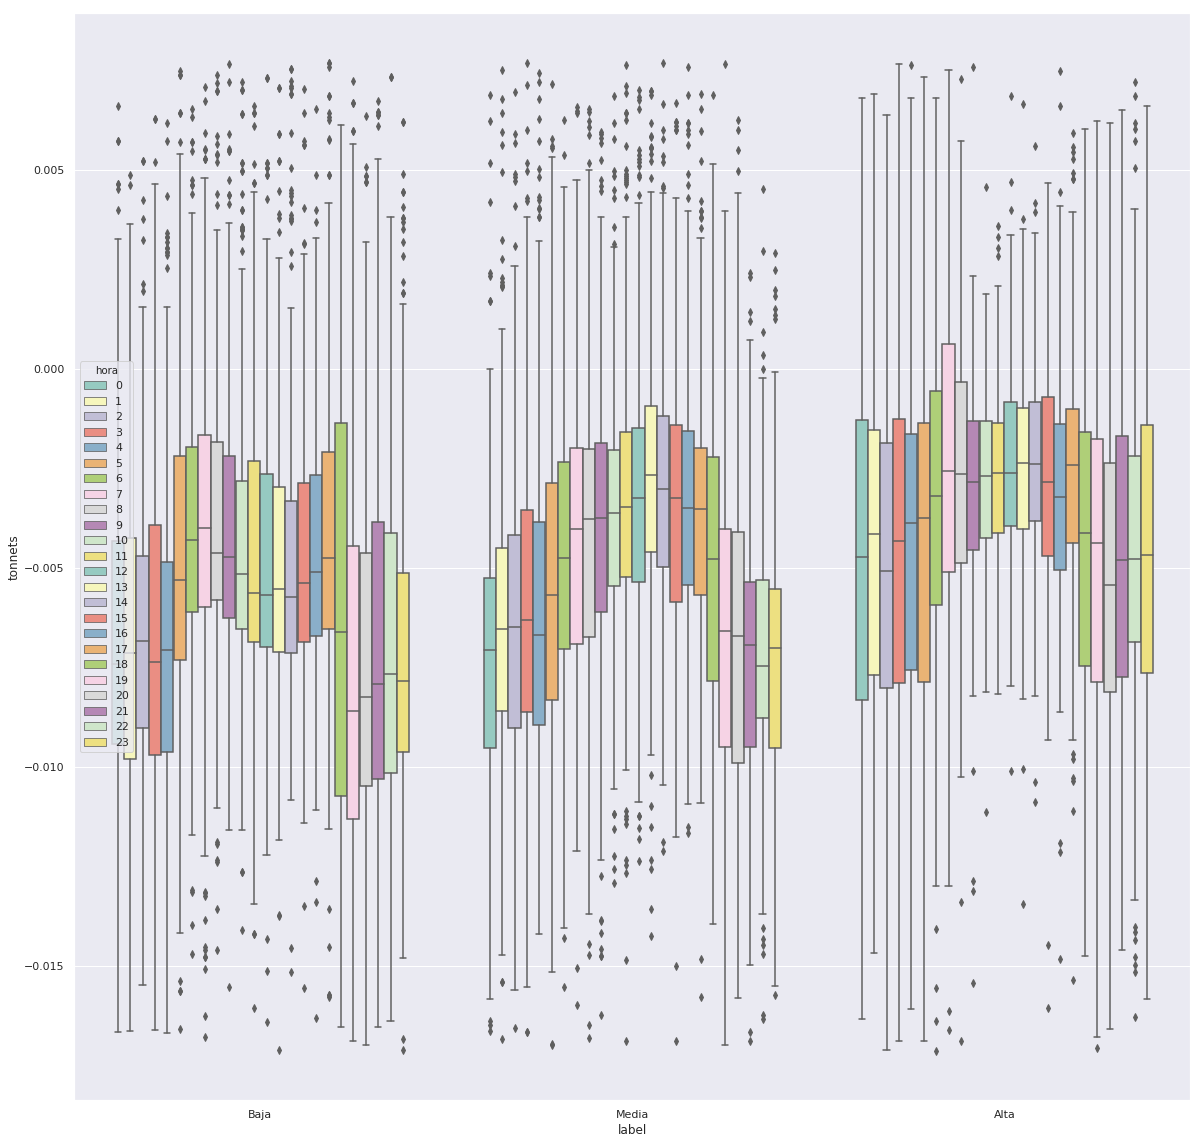

In [46]:
sns.set(rc={'figure.figsize':(20,20)})

ax = sns.boxplot(x="label", y="tonnets", hue="hora", data=scals, palette="Set3")

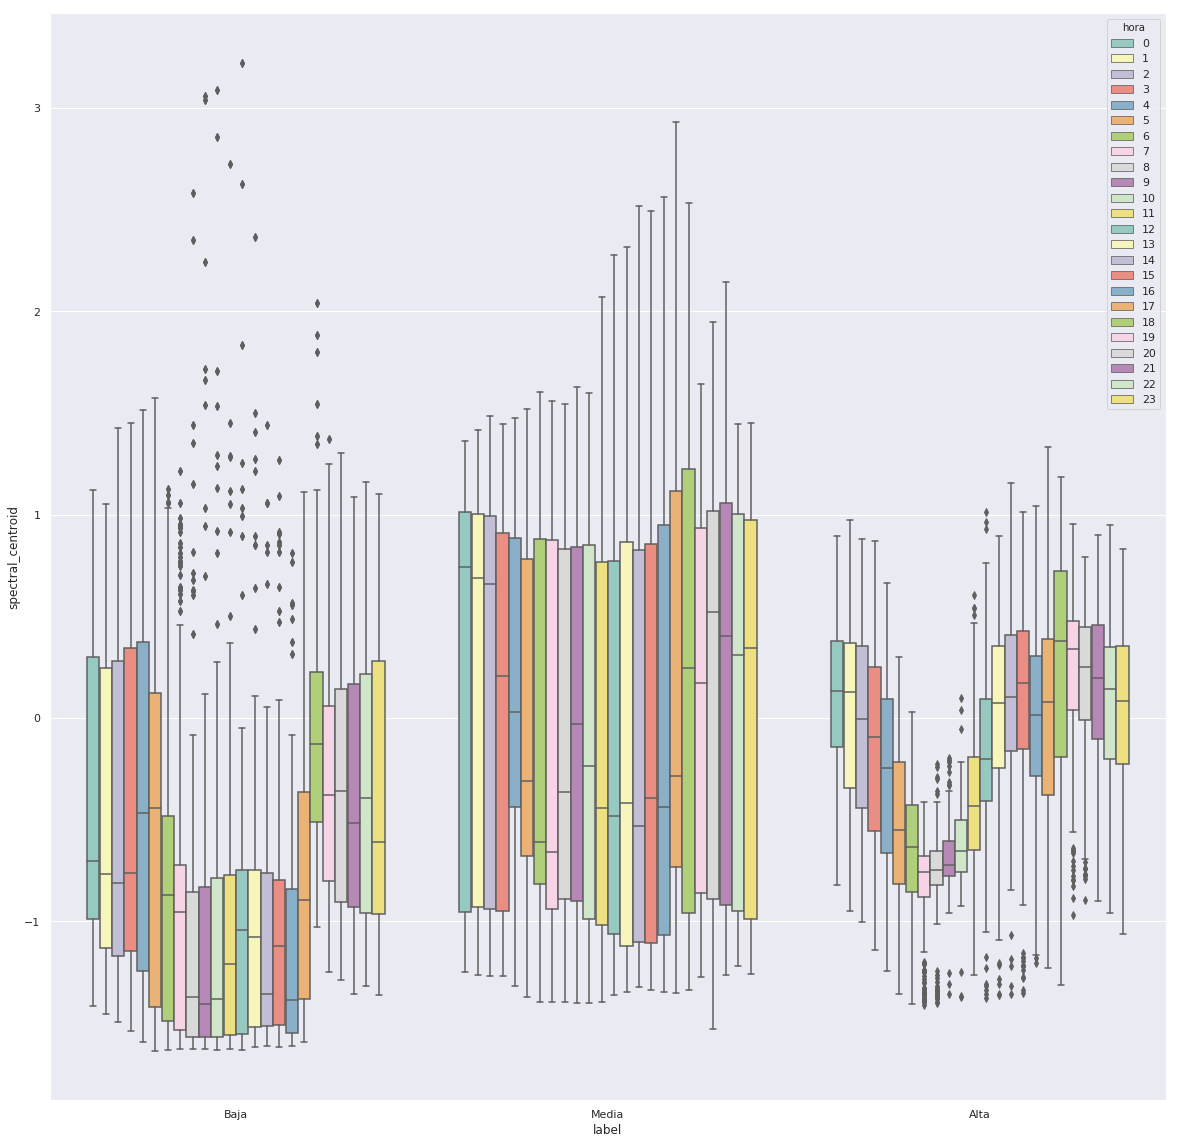

In [47]:
ax = sns.boxplot(x="label", y="spectral_centroid", hue="hora", data=scals, palette="Set3")

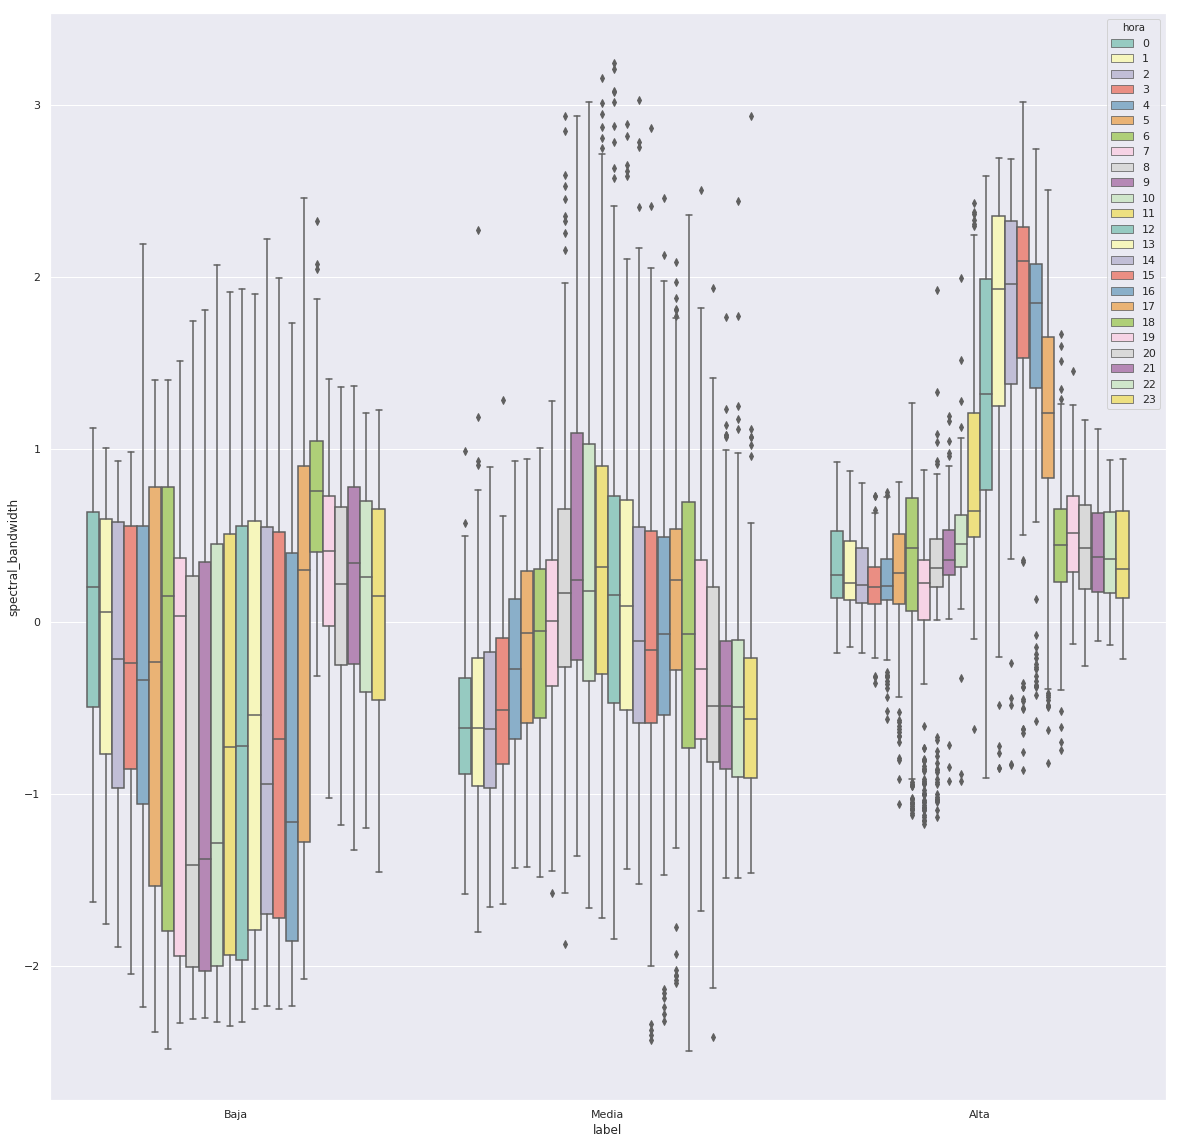

In [48]:
ax = sns.boxplot(x="label", y="spectral_bandwidth", hue="hora", data=scals, palette="Set3")

In [32]:
scalxlabel['filename'] = datos["filename"]
scals=scalxlabel.sort_values(by="filename")
scals.head()


,chroma_stft,spectral_centroid,spectral_bandwidth,tonnets,te,ems,md,p,label,etapa,hora,filename
19137,-1.022806,1.302299,-1.052849,-0.011809,-0.583355,0.379557,3.826630,0.098130,Media,e4,21000,3785/20170123/LAS40-3785_20170123_021000.wav
19146,-1.111318,1.407285,-1.165434,-0.005413,-0.695204,0.665612,3.475226,0.082012,Media,e4,34000,3785/20170123/LAS40-3785_20170123_034000.wav
19030,-0.994004,1.419658,-1.018409,-0.003885,-0.646514,0.083809,2.657273,0.071399,Media,e1,41000,3785/20170123/LAS40-3785_20170123_041000.wav
19149,-1.003274,1.424162,-1.229718,-0.008292,-0.722629,-1.005906,3.003893,0.100878,Media,e1,42000,3785/20170123/LAS40-3785_20170123_042000.wav
19150,-1.081432,1.414830,-1.048116,-0.003845,-0.799953,-0.440998,2.330881,0.056126,Media,e1,43000,3785/20170123/LAS40-3785_20170123_043000.wav


In [57]:
ss=scalxlabel.iloc[0:250]


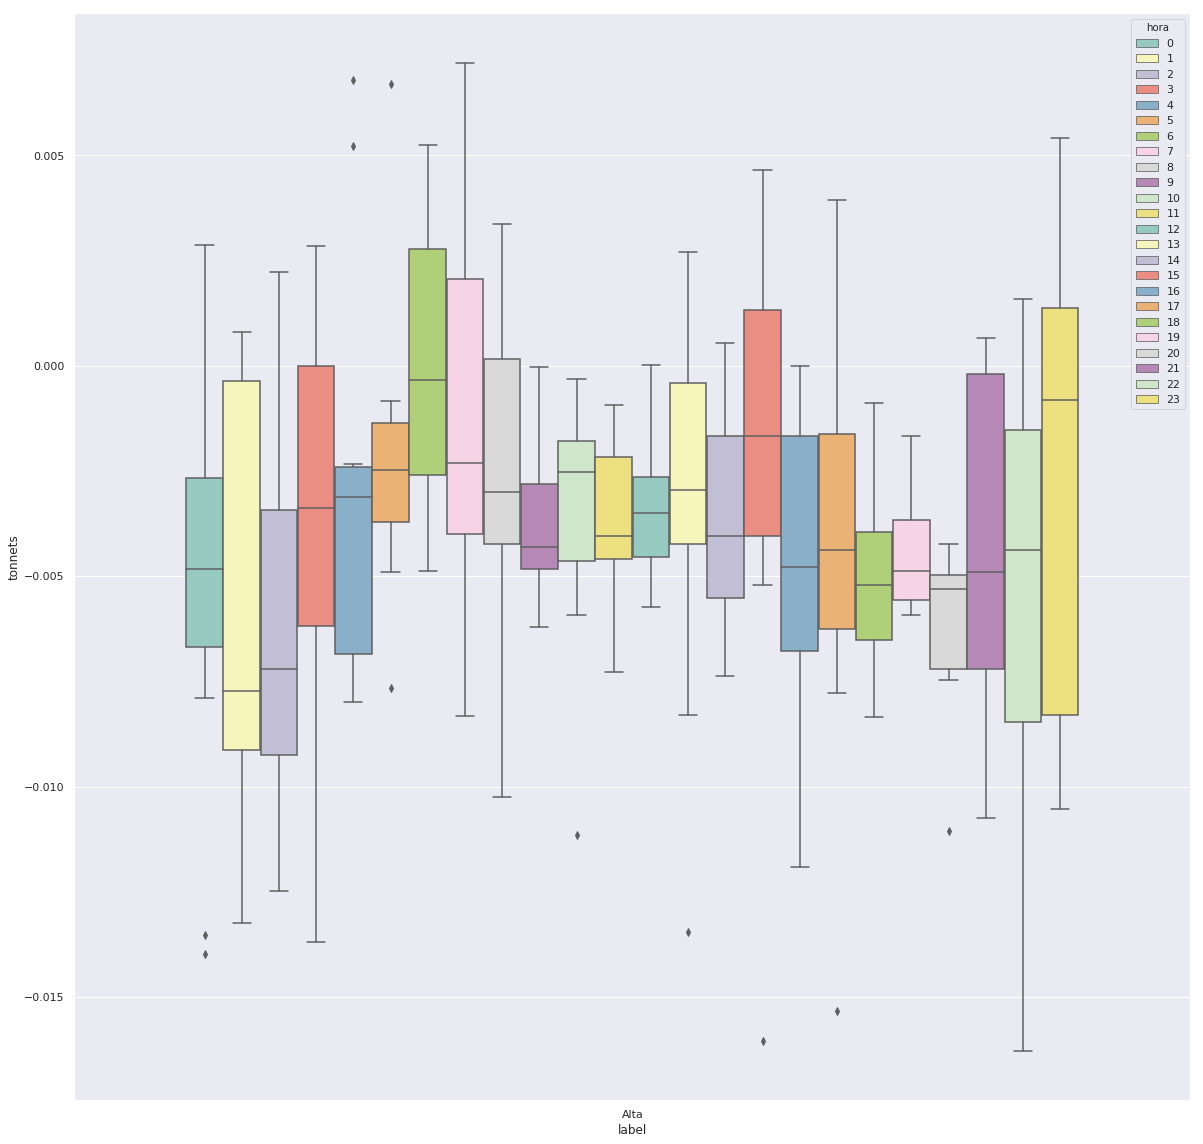

In [58]:
ss.head()
ax = sns.boxplot(x="label", y="tonnets", hue="hora", data=ss, palette="Set3")

In [64]:
scalxlabel.shape

(16972, 12)

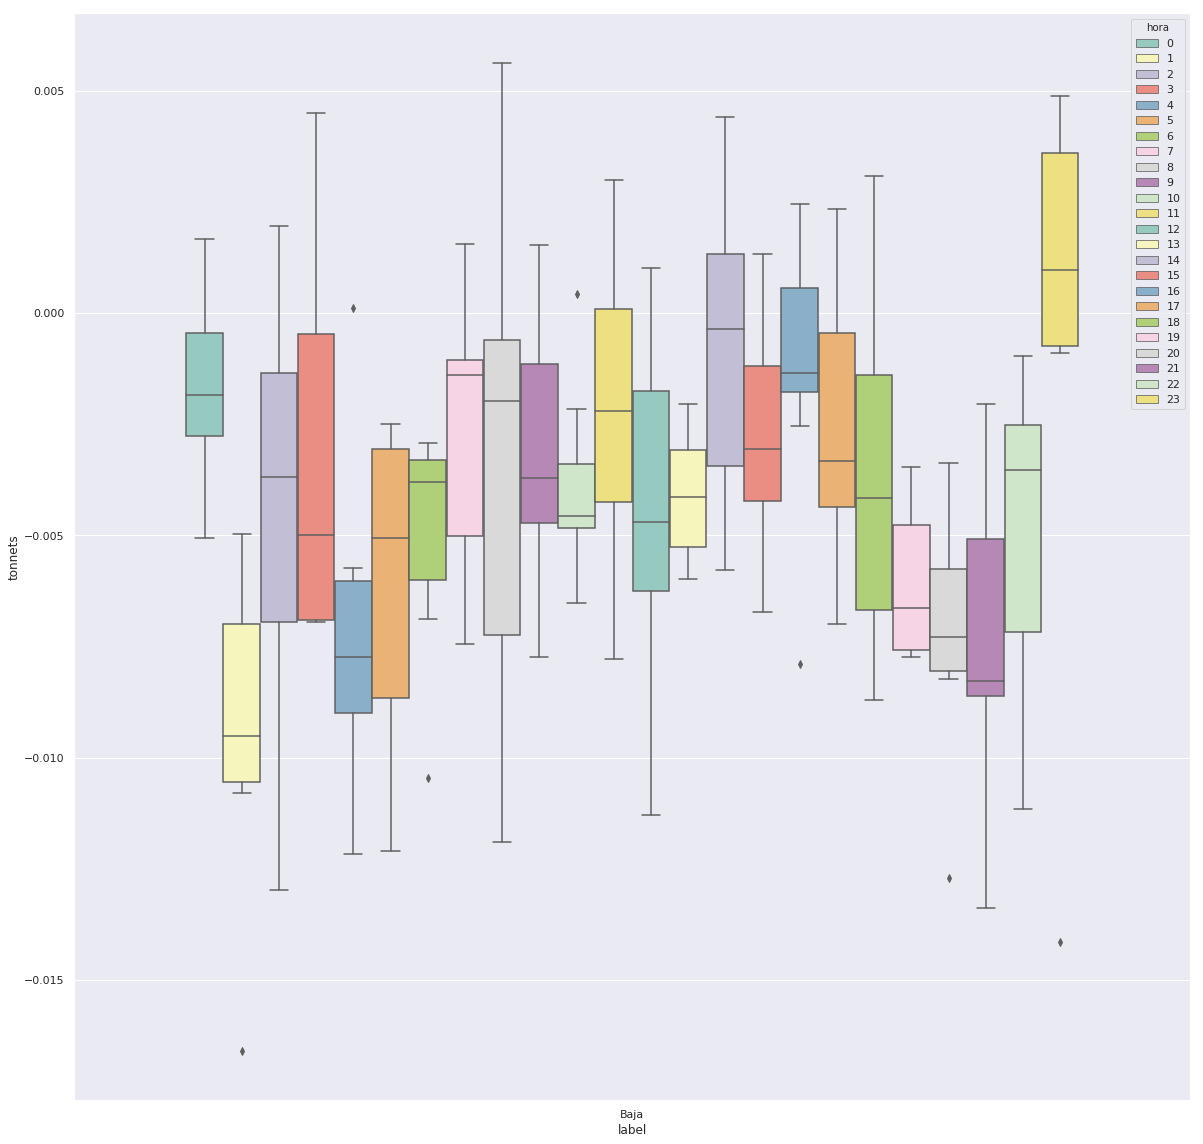

In [68]:
ss=scalxlabel.iloc[4000:4200]
ss.head()
ax = sns.boxplot(x="label", y="tonnets", hue="hora", data=ss, palette="Set3")

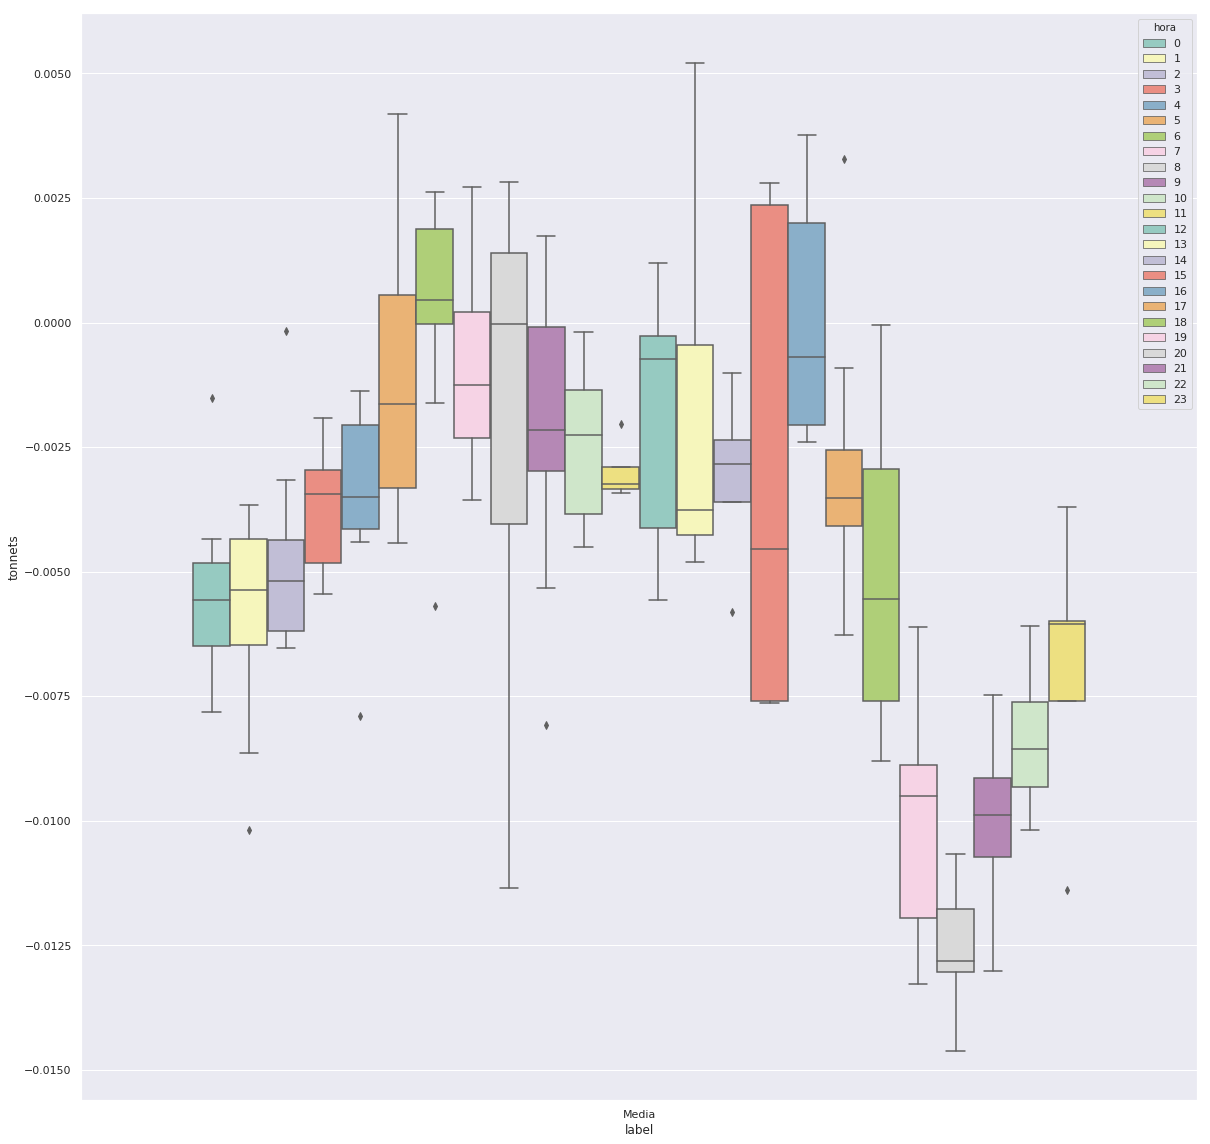

In [70]:
ss=scalxlabel.iloc[10000:10200]
ss.head()
ax = sns.boxplot(x="label", y="tonnets", hue="hora", data=ss, palette="Set3")

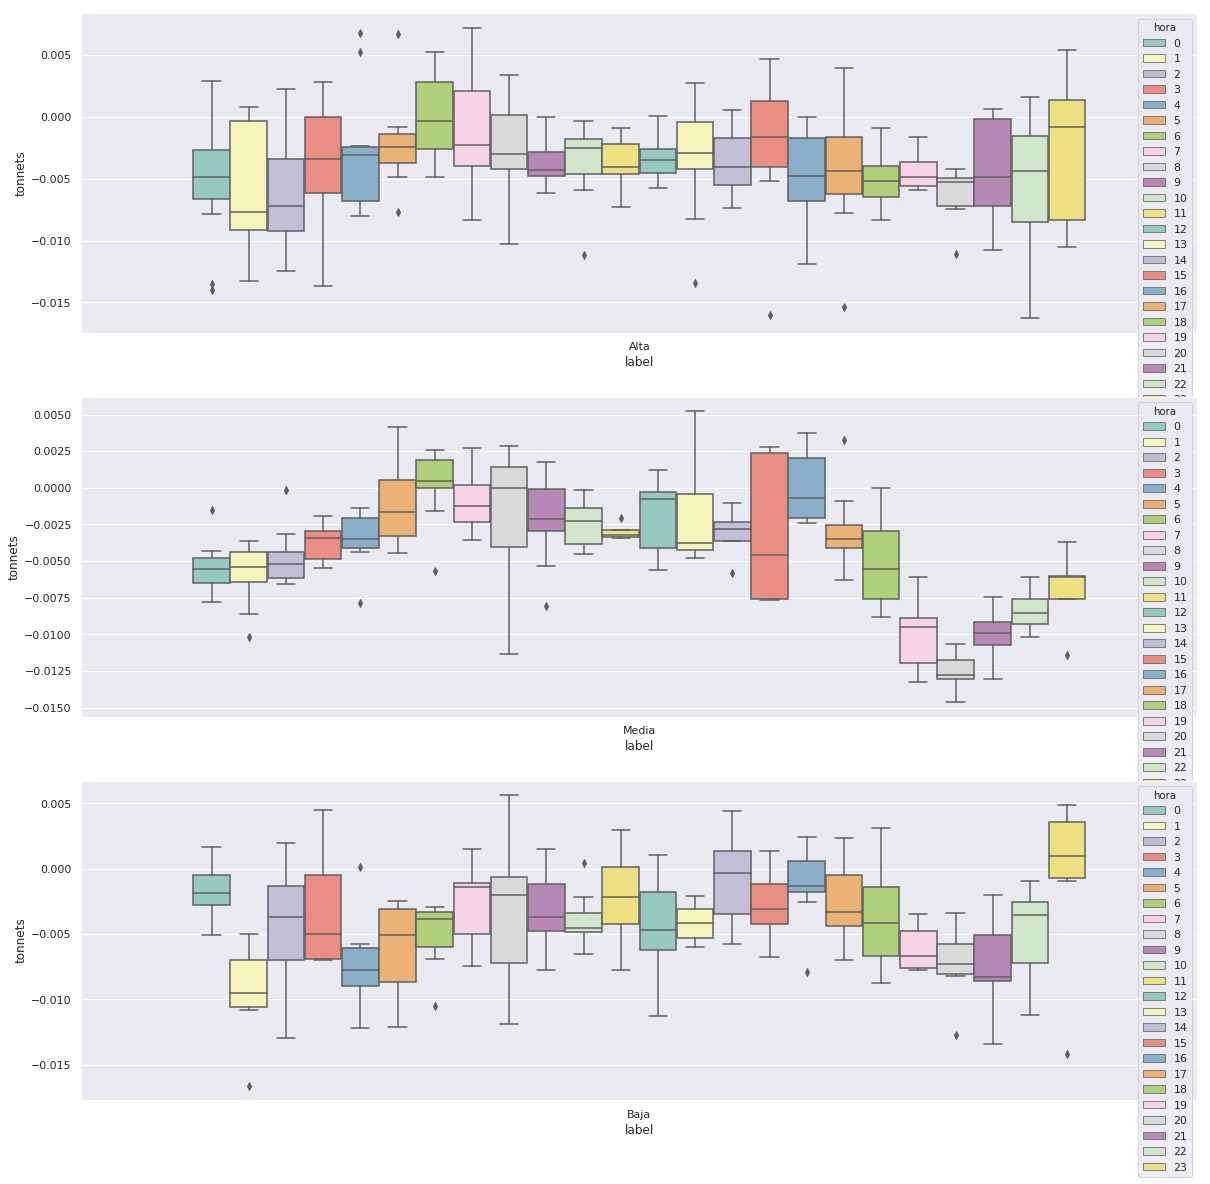

In [80]:
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ss=scalxlabel.iloc[0:250]
sns.boxplot(x="label", y="tonnets", hue="hora", data=ss, palette="Set3",ax=ax1)
ss1=scalxlabel.iloc[10000:10200]
sns.boxplot(x="label", y="tonnets", hue="hora", data=ss1, palette="Set3",ax=ax2)
ss3=scalxlabel.iloc[4000:4200]
ax = sns.boxplot(x="label", y="tonnets", hue="hora", data=ss3, palette="Set3",ax=ax3)


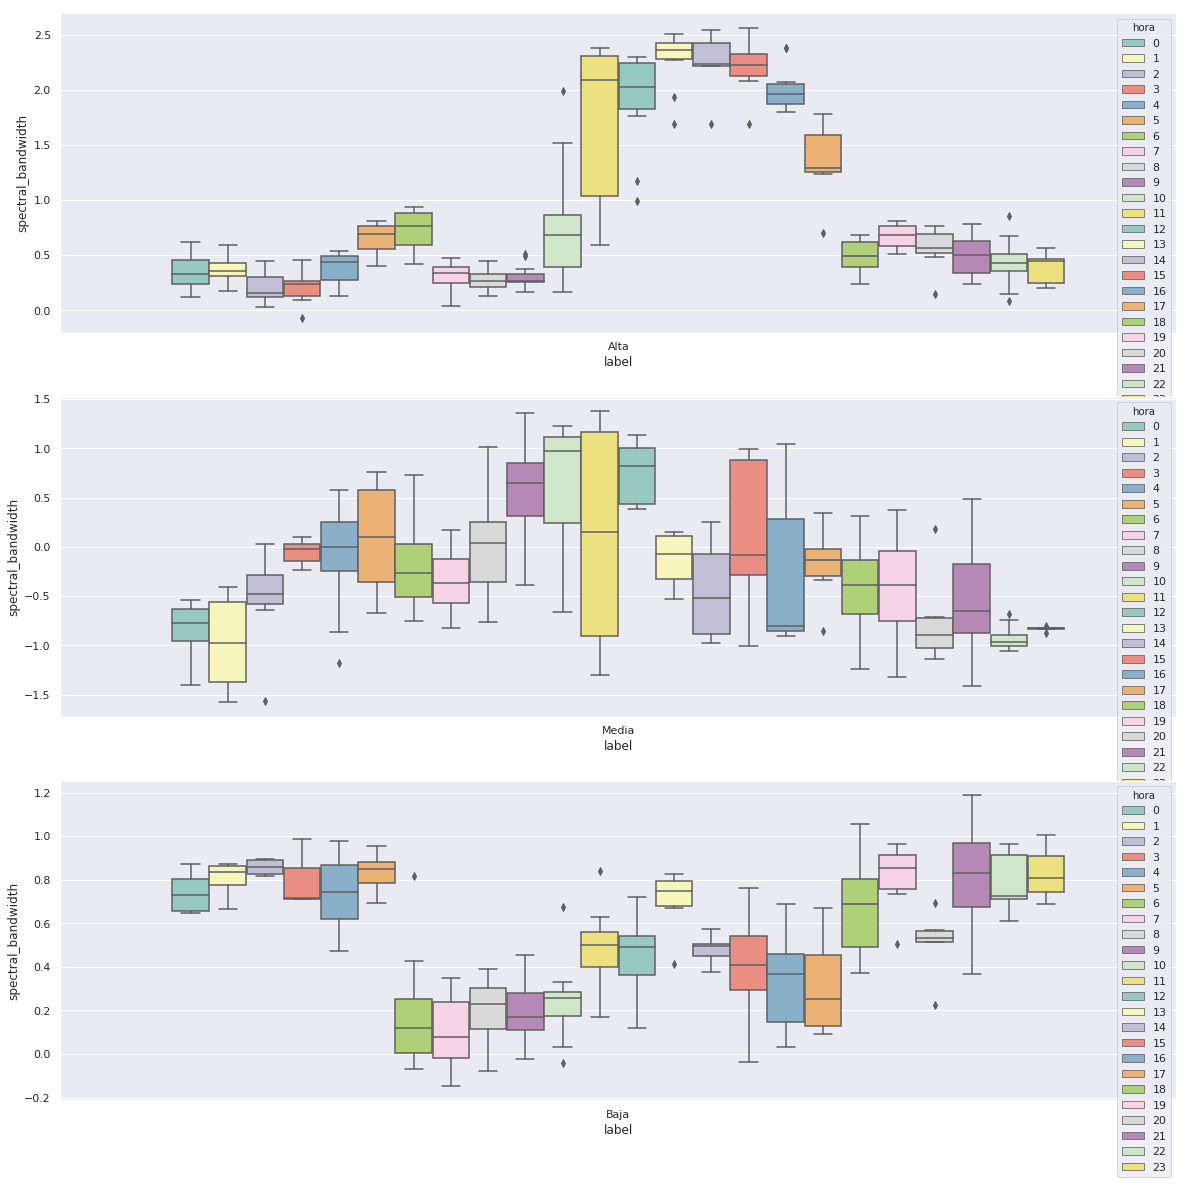

In [82]:
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
var='spectral_bandwidth'
ss=scalxlabel.iloc[0:250]
sns.boxplot(x="label", y=var, hue="hora", data=ss, palette="Set3",ax=ax1)
ss1=scalxlabel.iloc[10000:10200]
sns.boxplot(x="label", y=var, hue="hora", data=ss1, palette="Set3",ax=ax2)
ss3=scalxlabel.iloc[4000:4200]
ax = sns.boxplot(x="label", y=var, hue="hora", data=ss3, palette="Set3",ax=ax3)


# Tonnets

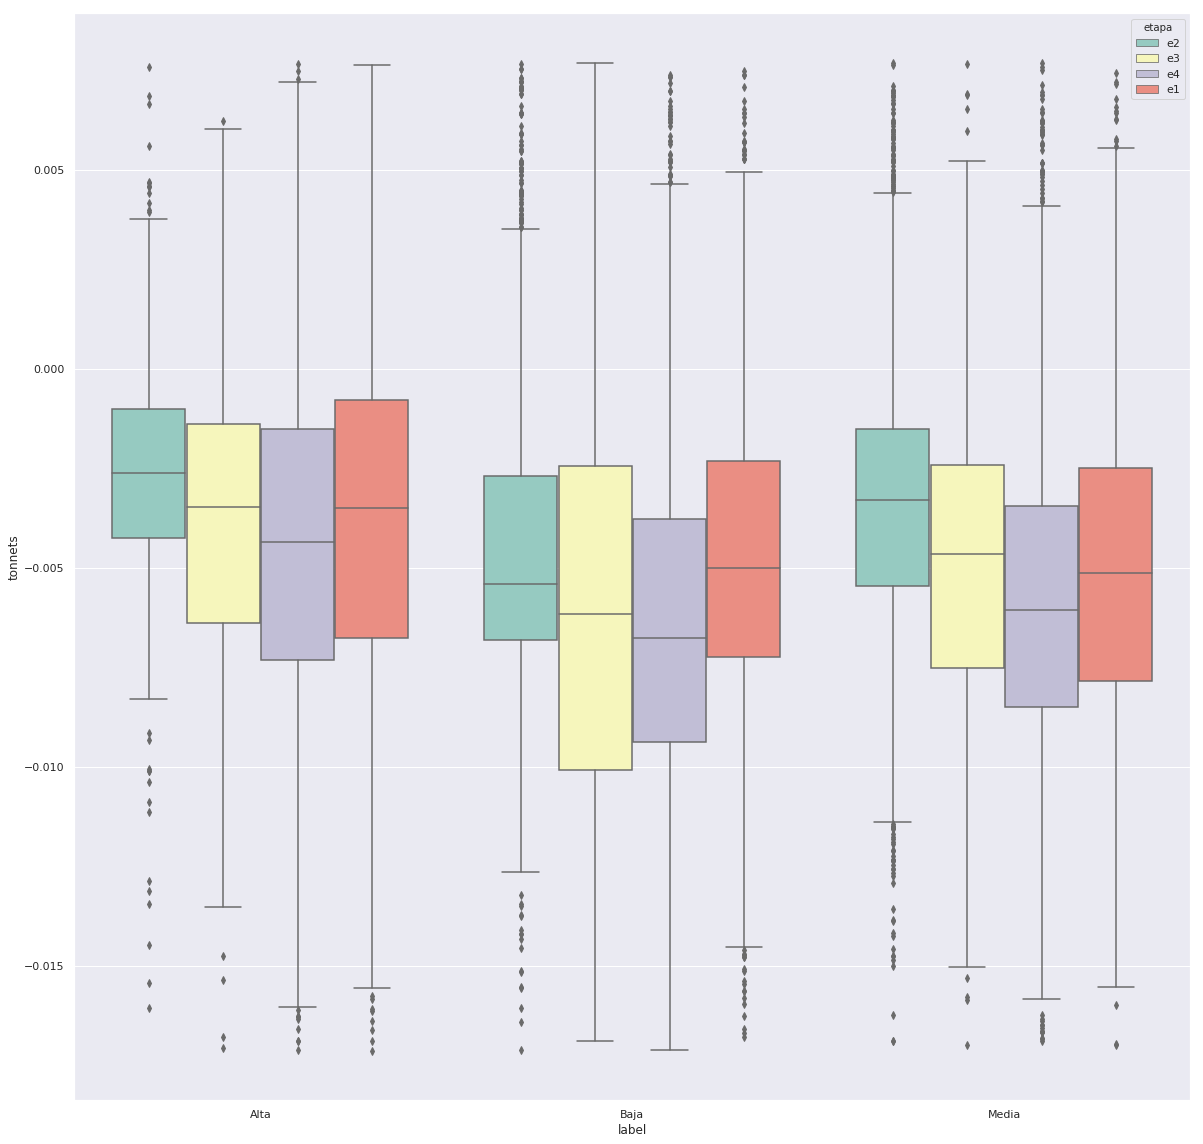

In [34]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,20)})

ax = sns.boxplot(x="label", y="tonnets", hue="etapa", data=scalxlabel, palette="Set3")

# Spectral Centroid

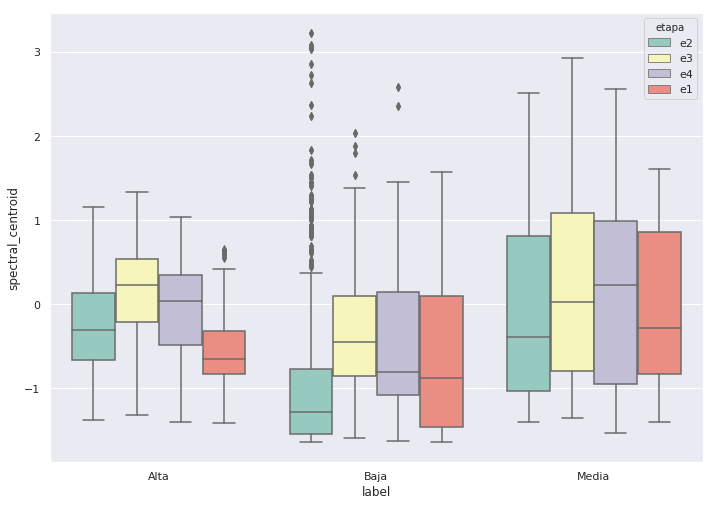

In [29]:
ax = sns.boxplot(x="label", y="spectral_centroid", hue="etapa", data=scalxlabel, palette="Set3")

# spectral_bandwidth

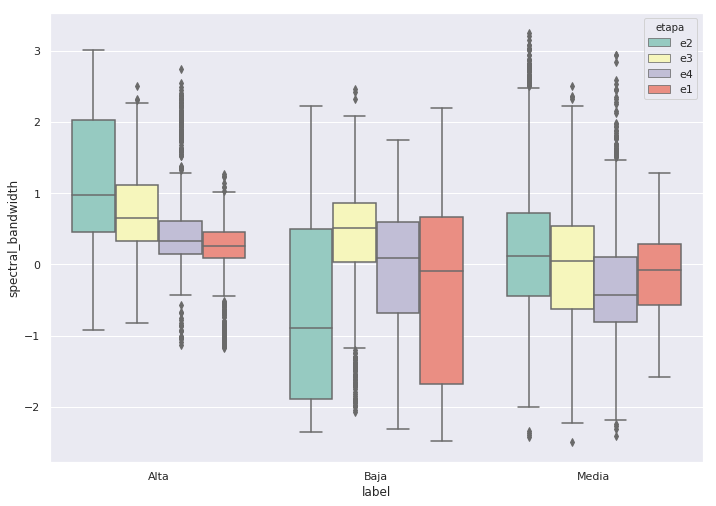

In [30]:
ax = sns.boxplot(x="label", y="spectral_bandwidth", hue="etapa", data=scalxlabel, palette="Set3")

# md


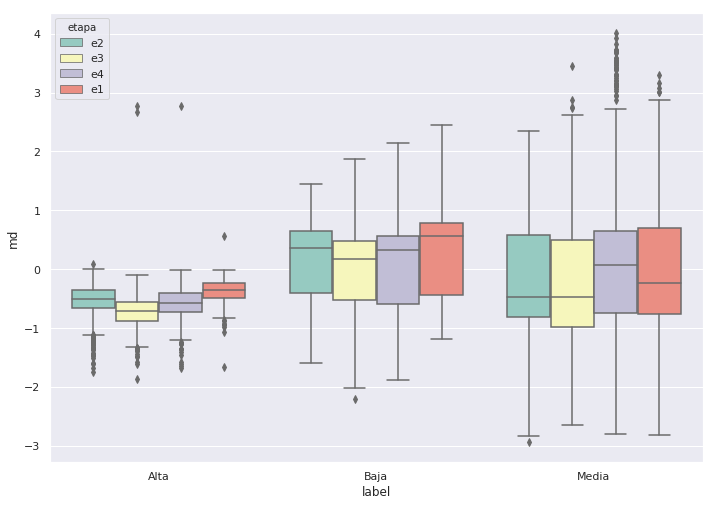

In [31]:
ax = sns.boxplot(x="label", y="md", hue="etapa", data=scalxlabel, palette="Set3")

# ems

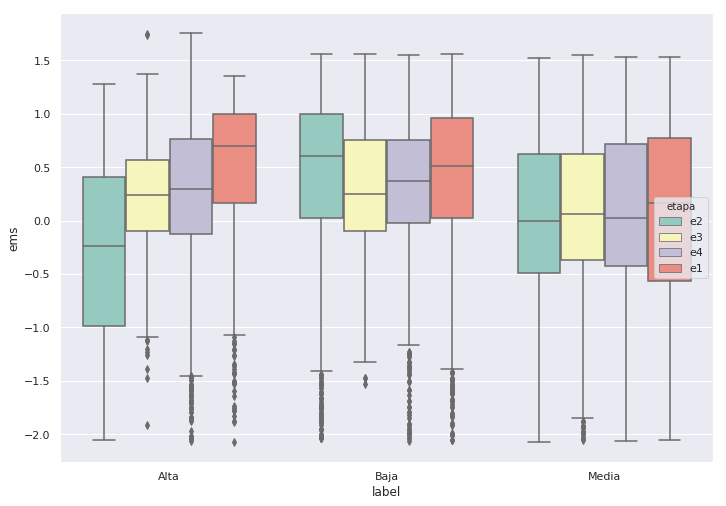

In [32]:
ax = sns.boxplot(x="label", y="ems", hue="etapa", data=scalxlabel, palette="Set3")

/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


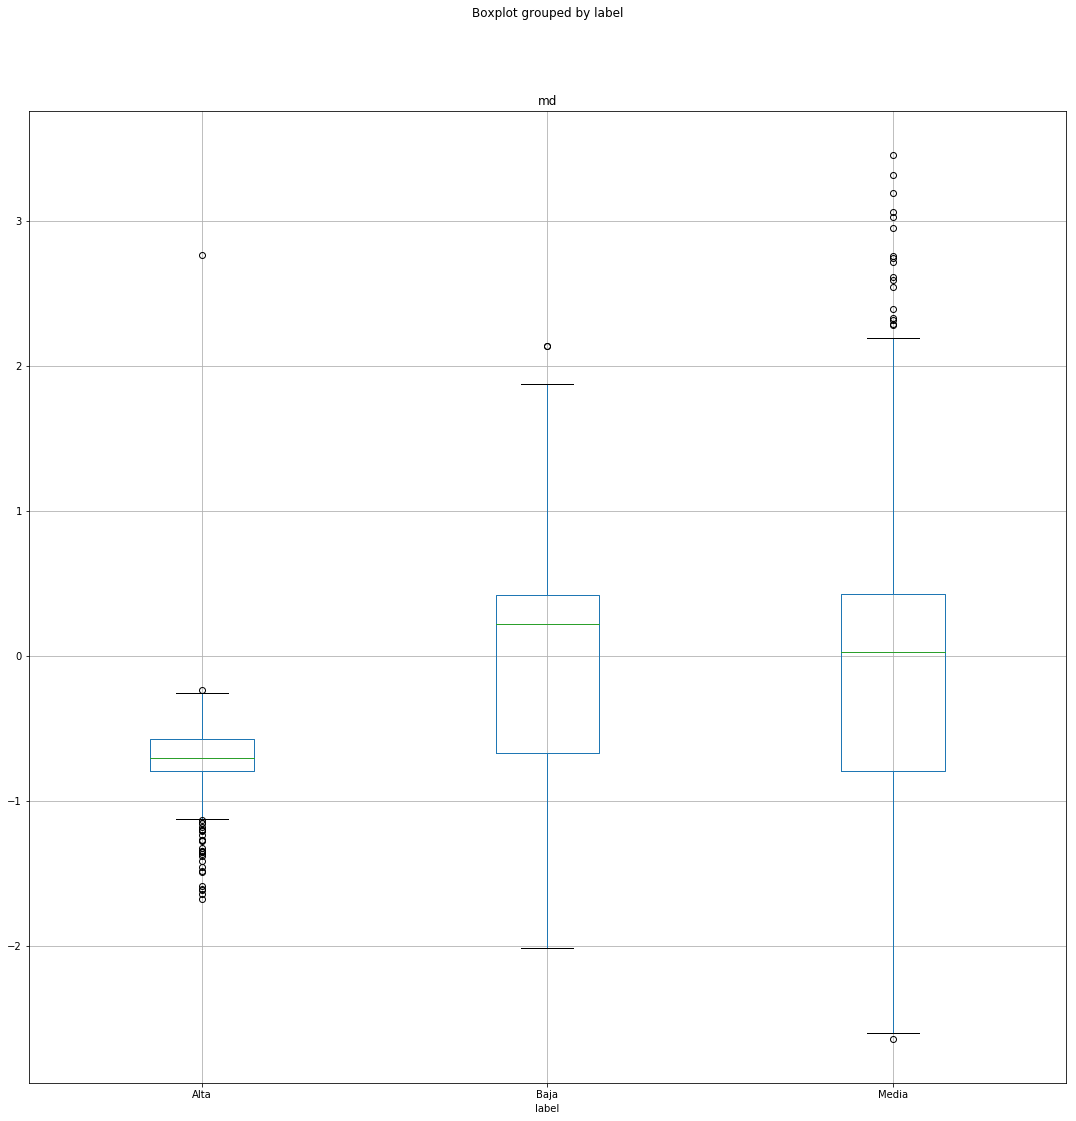

In [419]:
fig=scalxlabel[datos['mañana'] == 'night'].boxplot(figsize = (18,18),by='label',column='md')

/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


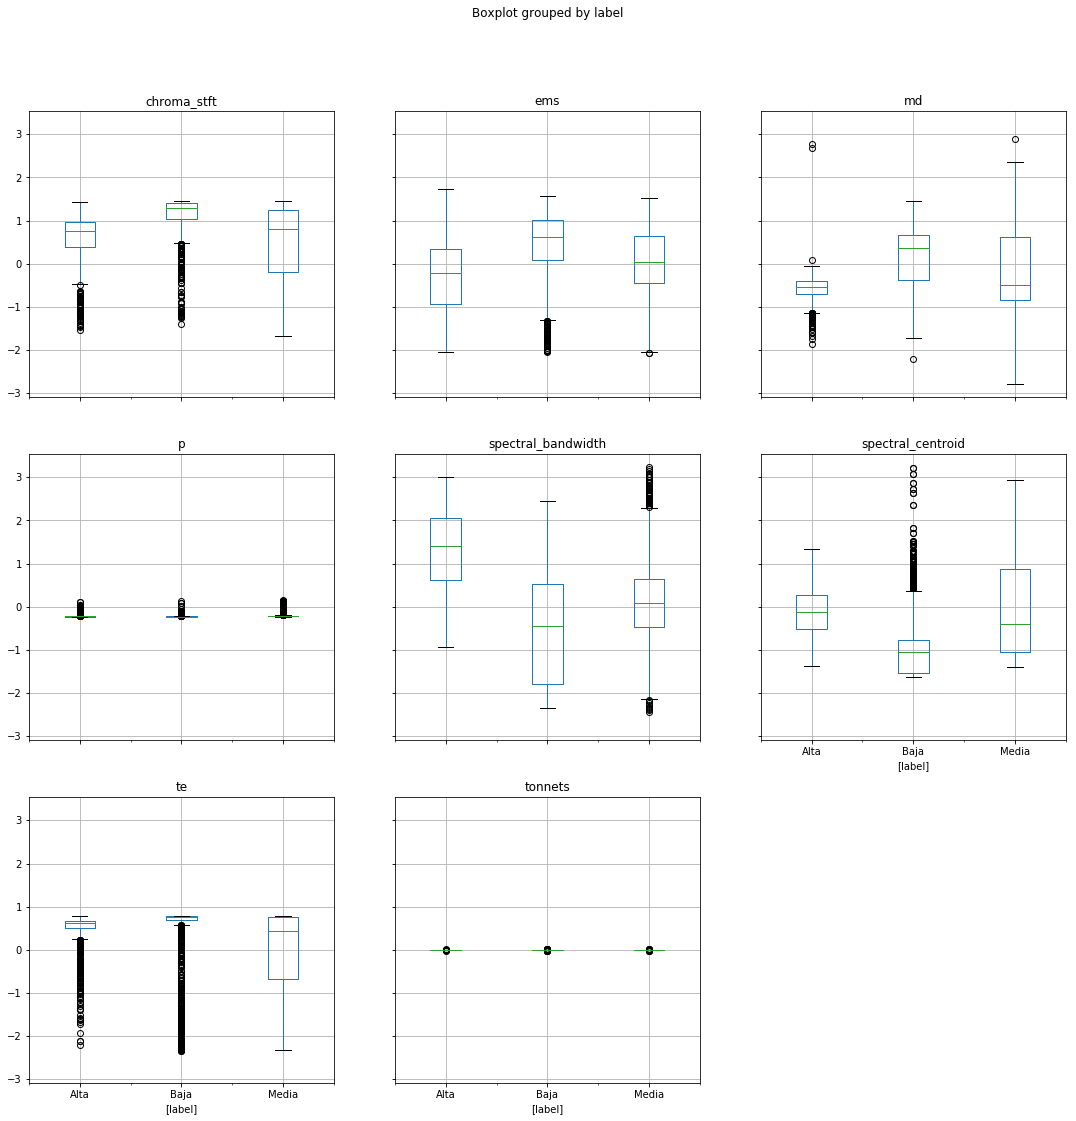

In [407]:


fig=scalxlabel[datos['mañana'] == 'afternoon'].boxplot(figsize = (18,18),by='label')

# Tonnets

/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


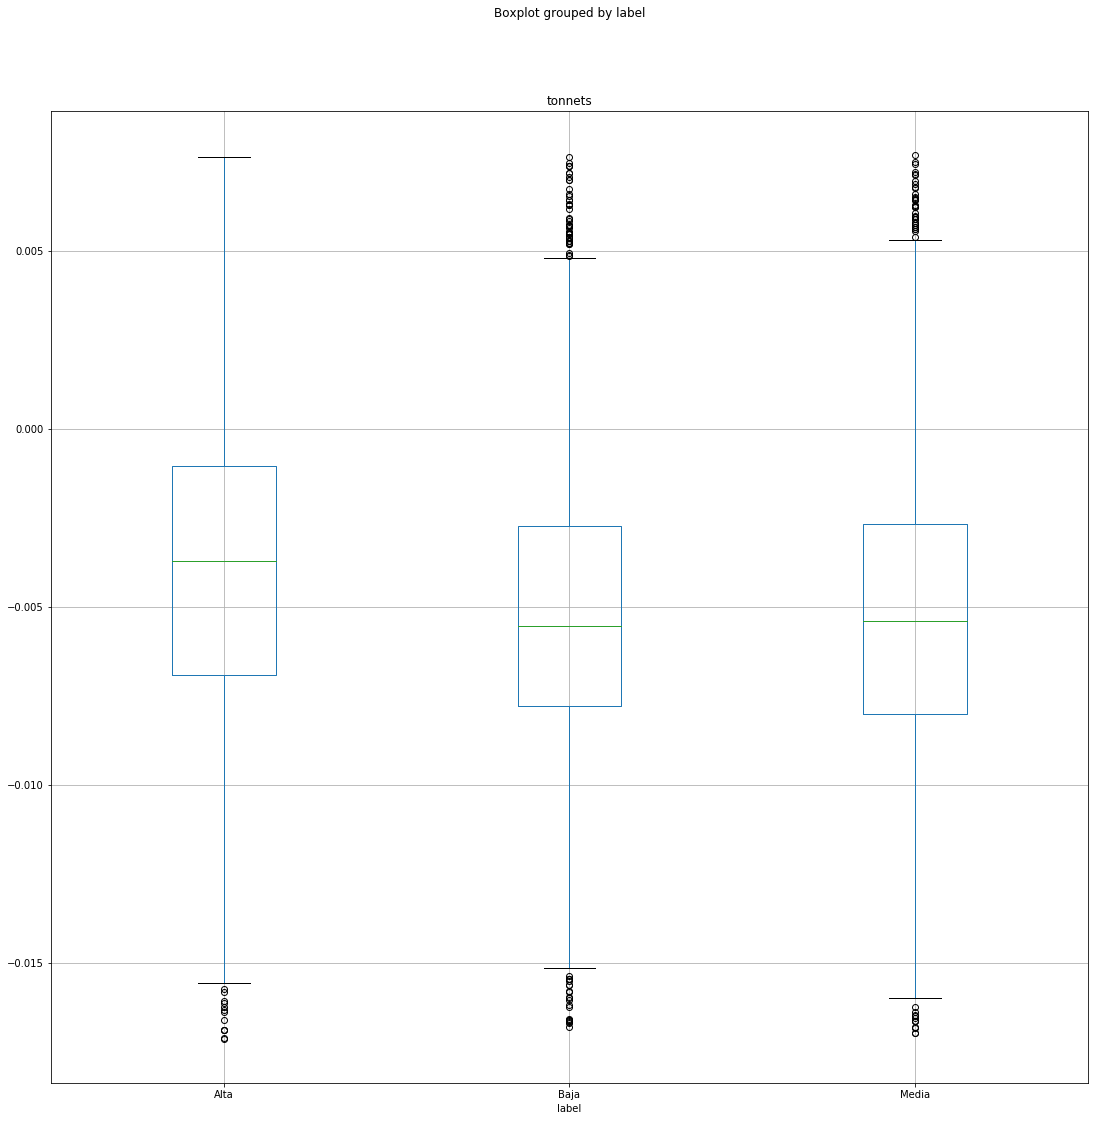

In [421]:
fig=scalxlabel[datos['mañana'] == 'morning'].boxplot(figsize = (18,18),by='label',column='tonnets')

/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


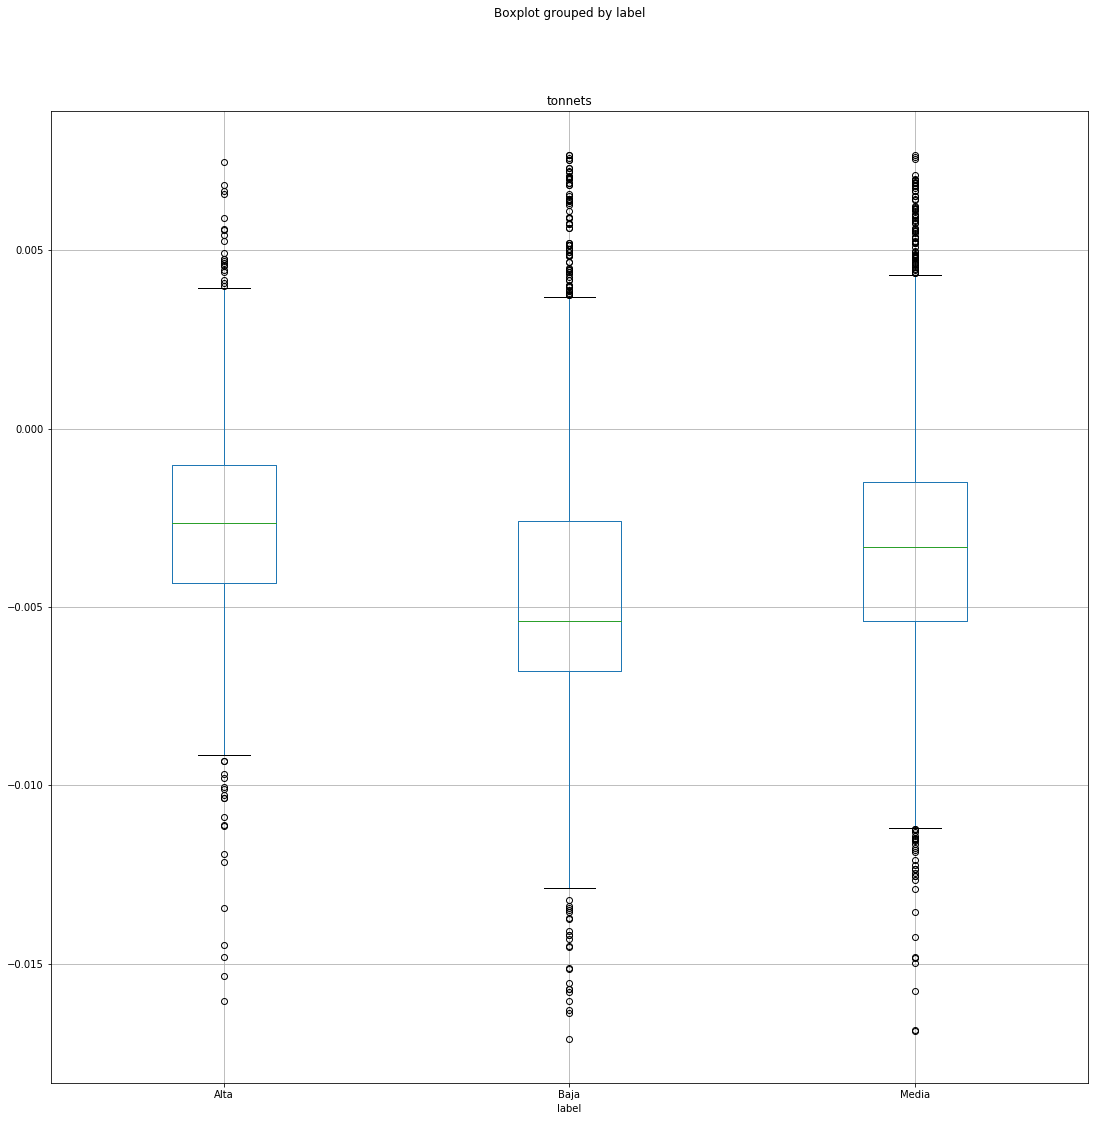

In [420]:
fig=scalxlabel[datos['mañana'] == 'afternoon'].boxplot(figsize = (18,18),by='label',column='tonnets')

/home/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


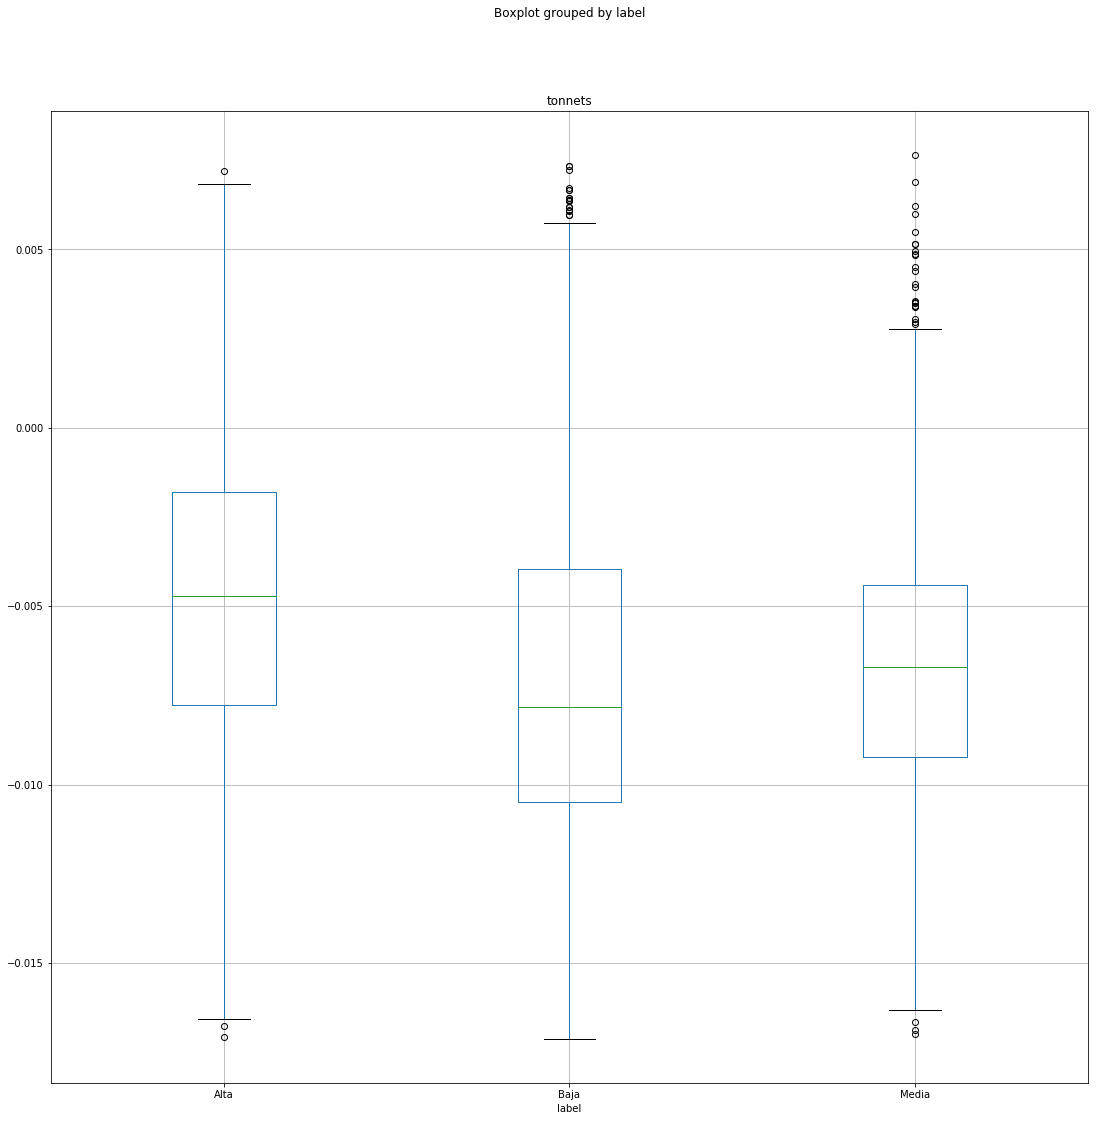

In [422]:
fig=scalxlabel[datos['mañana'] == 'night'].boxplot(figsize = (18,18),by='label',column='tonnets')